### Project Overview
This project focuses on customer segmentation for a retail business, using big data analytics techniques.

### Project Goals and Summary
The primary objectives are to:
- Provide insights into monthly product sales trends.
- Analyze monthly customer spending patterns.
- Mitigate risks by refining strategies on when, where, and to whom products are marketed.
- Enhance marketing efficiency by targeting customer segments effectively based on their characteristics.

### Project Challenges
- Dataset size too large for Excel, requiring a scalable solution.
- Requires inter-departmental coordination.
- Demographic data contains missing values and typos.

### Methodology and Analytical Techniques
- **Descriptive Analysis**: Summarizing basic data insights.
- **Graphical Analysis**: Visualizing data distributions and trends.
- **Segmentation Analysis**: Dividing customers into meaningful segments.

### Business Benefits
- Supports Business Development in product differentiation tailored to each customer segment.
- Guides targeted customer treatment based on specific criteria.

### Expected Outcomes
- Gain insights into monthly product sales.
- Understand monthly customer spending patterns.
- Perform a detailed customer segmentation analysis.
- Provide recommendations derived from segmentation insights.

### Understanding the Data
- **Retail transaction data** covering December 1, 2010, to December 9, 2011.
- **Data Source**: UCI Machine Learning Repository - Online Retail Dataset.

### Dataset Description
- **InvoiceNo**: Unique transaction identifier.
- **StockCode**: Unique product identifier.
- **Description**: Product name.
- **Quantity**: Quantity of each product in the transaction.
- **InvoiceDate**: Date and time of the transaction.
- **UnitPrice**: Price per unit of the product.
- **CustomerID**: Unique identifier for each customer.
- **Country**: Country of the customer's residence.

### Data Preparation and Preprocessing
#### Code Setup:
- **Python Version**: 3.9.20
- **Libraries**: Pandas, Numpy, Matplotlib, Seaborn, Scikit-Learn, and Feature-Engine


In [3]:
#Importing Packages

! pip install feature_engine
! pip install plotly


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.1/19.1 MB 4.7 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [4]:
#Importing Packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt
from datetime import datetime as dt2
from datetime import timedelta as td
from datetime import time as tm

from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

import plotly.offline as pyoff
import plotly.graph_objs as go

import feature_engine
from feature_engine.outliers import Winsorizer

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.metrics import davies_bouldin_score

import warnings
warnings.filterwarnings("ignore")

In [4]:
# Import Dataset
import pandas as pd
df = pd.read_excel('Online Retail.xlsx')

In [9]:
#Check Dataset

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [11]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


The dataset shows some anomalies: 
- **Quantity** ranges from -80995 to 80995, indicating potential returns or cancellations.
- **UnitPrice** also contains negative values, which likely represent canceled orders or adjustments for bad debt.

These records will be removed to ensure that the analysis reflects actual sales transactions.


In [12]:
df.nunique()

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64

In [13]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

The dataset contains significant missing values:
- **CustomerID**: Approximately 25% of entries are missing `CustomerID`, making it impossible to identify the associated customers.
  
Records with missing `CustomerID` values will be removed to ensure data completeness for customer segmentation.


In [14]:
#Country

df.Country.value_counts(normalize=True) 

Country
United Kingdom          0.914320
Germany                 0.017521
France                  0.015790
EIRE                    0.015124
Spain                   0.004674
Netherlands             0.004375
Belgium                 0.003818
Switzerland             0.003694
Portugal                0.002803
Australia               0.002323
Norway                  0.002004
Italy                   0.001482
Channel Islands         0.001399
Finland                 0.001283
Cyprus                  0.001148
Sweden                  0.000853
Unspecified             0.000823
Austria                 0.000740
Denmark                 0.000718
Japan                   0.000661
Poland                  0.000629
Israel                  0.000548
USA                     0.000537
Hong Kong               0.000531
Singapore               0.000423
Iceland                 0.000336
Canada                  0.000279
Greece                  0.000269
Malta                   0.000234
United Arab Emirates    0.000125
Eu

The dataset reveals that **over 90%** of the customers are from the **United Kingdom**. To maintain focus and improve analysis consistency, only transactions from United Kingdom customers will be used for segmentation.


In [15]:
df = df[df.Country == 'United Kingdom']

In [16]:
#Removing the negative values from Quantity 

df = df[df.Quantity > 0]

In [17]:
#InvoiceDate

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['InvoiceYearMonth'] = df['InvoiceDate'].map(lambda date: 100*date.year + date.month)
df['Date'] = df['InvoiceDate'].dt.strftime('%Y-%m')

In [18]:
#timebound

print(df["InvoiceDate"].min())
print(df["InvoiceDate"].max())
print("The data is from 1 year transaction")

2010-12-01 08:26:00
2011-12-09 12:49:00
The data is from 1 year transaction


In [20]:
#Removing the negative values from UnitPrice

df = df[df.UnitPrice > 0]

In [21]:
#Removing the Null values from the data

df = df[pd.notnull(df['CustomerID'])]

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 354321 entries, 0 to 541893
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   InvoiceNo         354321 non-null  object        
 1   StockCode         354321 non-null  object        
 2   Description       354321 non-null  object        
 3   Quantity          354321 non-null  int64         
 4   InvoiceDate       354321 non-null  datetime64[ns]
 5   UnitPrice         354321 non-null  float64       
 6   CustomerID        354321 non-null  float64       
 7   Country           354321 non-null  object        
 8   InvoiceYearMonth  354321 non-null  int64         
 9   Date              354321 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(5)
memory usage: 29.7+ MB


# Exploratory Data Analysis

In [23]:
#Aggregating the Orders by Month

df_agg= df.groupby("Date").Quantity.sum()
df_agg.head()

Date
2010-12    267767
2011-01    278251
2011-02    213375
2011-03    276304
2011-04    260448
Name: Quantity, dtype: int64

In [25]:
#Converting series to dataframe and resetting index.

df_agg=pd.DataFrame(df_agg)
df_agg=df_agg.reset_index()
df_agg.head()

,index,Date,Quantity
0,0,2010-12,267767
1,1,2011-01,278251
2,2,2011-02,213375
3,3,2011-03,276304
4,4,2011-04,260448


In [26]:
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Quantity', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.plot(x, y, color='tab:Blue', marker='o')
    plt.show()

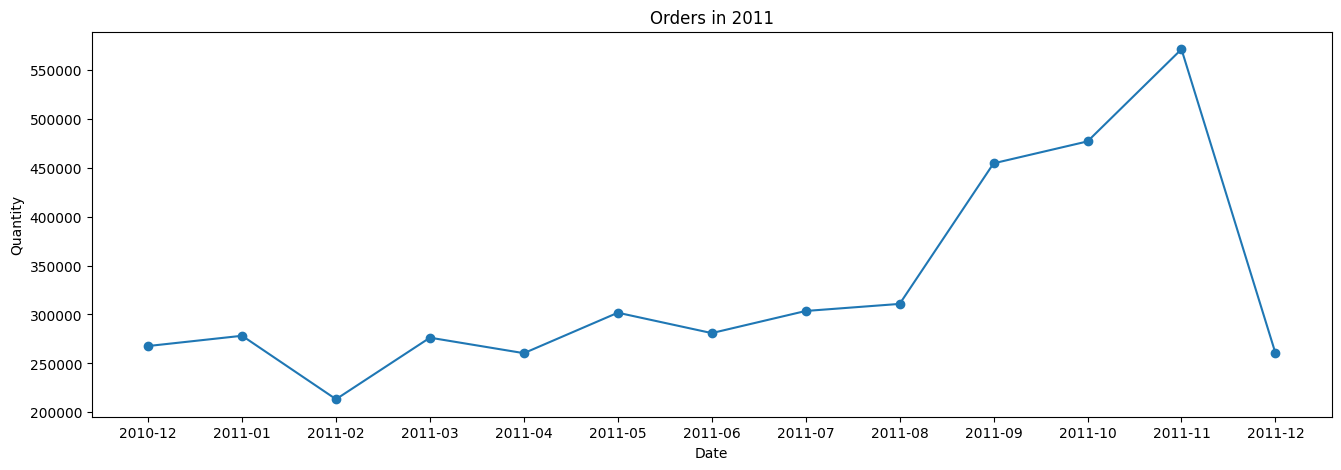

In [27]:
plot_df(df_agg, x=df_agg.Date, y=df_agg.Quantity,title='Orders in 2011')

In [28]:
#Calculating Revenue
#Revenue = Order Count * Average Revenue per Order

df['Revenue'] = df['Quantity']*df['UnitPrice']

<Axes: ylabel='Revenue'>

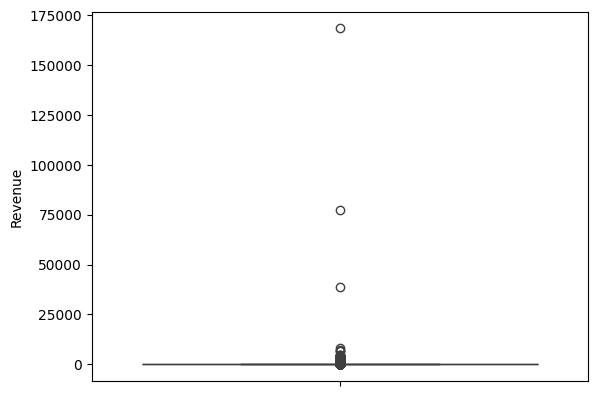

In [29]:
sns.boxplot(y=df['Revenue'])

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 354321 entries, 0 to 541893
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   InvoiceNo         354321 non-null  object        
 1   StockCode         354321 non-null  object        
 2   Description       354321 non-null  object        
 3   Quantity          354321 non-null  int64         
 4   InvoiceDate       354321 non-null  datetime64[ns]
 5   UnitPrice         354321 non-null  float64       
 6   CustomerID        354321 non-null  float64       
 7   Country           354321 non-null  object        
 8   InvoiceYearMonth  354321 non-null  int64         
 9   Date              354321 non-null  object        
 10  Revenue           354321 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(5)
memory usage: 32.4+ MB


In [31]:
#Monthly Revenue

df_revenue = df.groupby(['InvoiceYearMonth'])['Revenue'].sum().reset_index()
df_revenue.head()

,InvoiceYearMonth,Revenue
0,201012,498661.850
1,201101,442190.060
2,201102,355655.630
3,201103,467198.590
4,201104,409559.141


In [35]:
plot_data = [
    go.Scatter(
        x=df_revenue['InvoiceYearMonth'],
        y=df_revenue['Revenue'],
        mode='lines+markers'
    )
]

plot_layout = go.Layout(
    xaxis={"type": "category"},
    title='Monthly Revenue'
)

fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)


### RFM Analysis

RFM (Recency, Frequency, Monetary) analysis is a technique used to segment customers based on their purchasing behavior:

- **Recency**: How long it has been since the customer's last purchase.
- **Frequency**: How often the customer makes a purchase.
- **Monetary Value**: The total amount spent by the customer.

This analysis helps identify high-value customers and provides insights into customer loyalty and spending patterns. 

For this analysis, the last invoice date in the dataset is **2011-12-09**, which will be used as the reference date to calculate Recency.


In [36]:
NOW = dt.date(2011,12,9) 
df['Date'] = pd.DatetimeIndex(df.InvoiceDate).date

In [37]:
#Recency

df_recency = df.groupby(['CustomerID'],as_index=False)['Date'].max()
df_recency.columns = ['CustomerID','Last_Purchase_Date']

df_recency['Recency'] = df_recency.Last_Purchase_Date.apply(lambda x:(NOW - x).days)
df_recency.drop(columns=['Last_Purchase_Date'],inplace=True)
df_recency.head()

,CustomerID,Recency
0,12346.0,325
1,12747.0,2
2,12748.0,0
3,12749.0,3
4,12820.0,3


In [38]:
#Frequency - Monetarty

FM_Table = df.groupby('CustomerID').agg({'InvoiceNo'   : lambda x:len(x),
                                         'Revenue'  : lambda x:x.sum()})
FM_Table.rename(columns = {'InvoiceNo' :'Frequency',
                           'Revenue':'Monetary'},inplace= True)
FM_Table.head()

,Frequency,Monetary
CustomerID,,
12346.0,1,77183.60
12747.0,103,4196.01
12748.0,4595,33719.73
12749.0,199,4090.88
12820.0,59,942.34


In [39]:
RFM_Table = df_recency.merge(FM_Table,left_on='CustomerID',right_on='CustomerID')
RFM_Table.head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.60
1,12747.0,2,103,4196.01
2,12748.0,0,4595,33719.73
3,12749.0,3,199,4090.88
4,12820.0,3,59,942.34


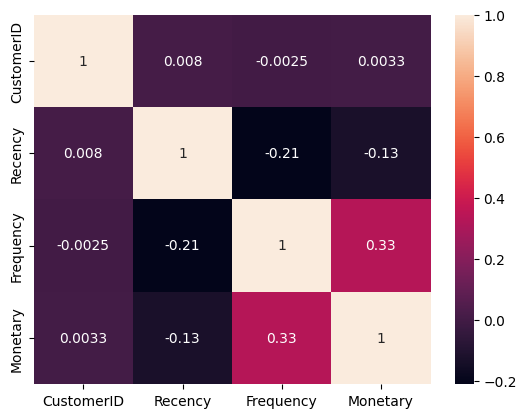

In [40]:
#Heatmap check
sns.heatmap(RFM_Table.corr(), annot=True);

### Modeling Data: RFM Quantiles

To segment customers, we split each RFM metric (Recency, Frequency, and Monetary) into quantiles:

- Each metric is assigned a score from **1 to 4**, where **1** represents the highest value and **4** represents the lowest.
- The final **RFM score** (Overall Value) is calculated by combining the individual scores for Recency, Frequency, and Monetary.

This scoring system allows us to rank customers based on their engagement and value to the business.


In [41]:
quantiles = RFM_Table.quantile(q=[0.25,0.50,0.75])
quantiles = quantiles.to_dict()

In [42]:
segmented_rfm = RFM_Table.copy()

In [43]:
def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [44]:
segmented_rfm['R_quartile'] = segmented_rfm['Recency'].apply(RScore, args=('Recency',quantiles))
segmented_rfm['F_quartile'] = segmented_rfm['Frequency'].apply(FMScore, args=('Frequency',quantiles))
segmented_rfm['M_quartile'] = segmented_rfm['Monetary'].apply(FMScore, args=('Monetary',quantiles))
segmented_rfm.head()

,CustomerID,Recency,Frequency,Monetary,R_quartile,F_quartile,M_quartile
0,12346.0,325,1,77183.60,4,4,1
1,12747.0,2,103,4196.01,1,1,1
2,12748.0,0,4595,33719.73,1,1,1
3,12749.0,3,199,4090.88,1,1,1
4,12820.0,3,59,942.34,1,2,2


### Calculating the Total RFM Score

The total RFM score is calculated by summing the individual quartile scores for Recency, Frequency, and Monetary:

In [45]:
segmented_rfm['RFM_Segment'] = segmented_rfm.R_quartile.map(str)+segmented_rfm.F_quartile.map(str)+segmented_rfm.M_quartile.map(str)

In [46]:
segmented_rfm.head()

,CustomerID,Recency,Frequency,Monetary,R_quartile,F_quartile,M_quartile,RFM_Segment
0,12346.0,325,1,77183.60,4,4,1,441
1,12747.0,2,103,4196.01,1,1,1,111
2,12748.0,0,4595,33719.73,1,1,1,111
3,12749.0,3,199,4090.88,1,1,1,111
4,12820.0,3,59,942.34,1,2,2,122


In [47]:
segmented_rfm['RFM_Score'] = segmented_rfm[['R_quartile','F_quartile','M_quartile']].sum(axis=1)

In [48]:
segmented_rfm.head()

,CustomerID,Recency,Frequency,Monetary,R_quartile,F_quartile,M_quartile,RFM_Segment,RFM_Score
0,12346.0,325,1,77183.60,4,4,1,441,9
1,12747.0,2,103,4196.01,1,1,1,111,3
2,12748.0,0,4595,33719.73,1,1,1,111,3
3,12749.0,3,199,4090.88,1,1,1,111,3
4,12820.0,3,59,942.34,1,2,2,122,5


In [49]:
print("Best Customers: ",len(segmented_rfm[segmented_rfm['RFM_Segment']=='111']))
print('Loyal Customers: ',len(segmented_rfm[segmented_rfm['F_quartile']==1]))
print("Big Spenders: ",len(segmented_rfm[segmented_rfm['M_quartile']==1]))
print('Almost Lost: ', len(segmented_rfm[segmented_rfm['RFM_Segment']=='134']))
print('Lost Customers: ',len(segmented_rfm[segmented_rfm['RFM_Segment']=='344']))
print('Lost Cheap Customers: ',len(segmented_rfm[segmented_rfm['RFM_Segment']=='444']))

Best Customers:  409
Loyal Customers:  980
Big Spenders:  980
Almost Lost:  21
Lost Customers:  168
Lost Cheap Customers:  343


In [50]:
# Setting up the label for each client and adding the column "Label" to the dataframe

label = [0] * len(segmented_rfm)

for i in range(0,len(segmented_rfm)):

    if segmented_rfm['RFM_Segment'][i] == '111':
        label[i] = "Best Customers"
        
    elif segmented_rfm['RFM_Segment'][i] == '134' :
        label[i] = "Almost Lost"
        
    elif segmented_rfm['RFM_Segment'][i] == '344':
        label[i] = "Lost Customers"
    
    elif segmented_rfm['RFM_Segment'][i] == '444':
        label[i] = "Lost Cheap Customers"

    elif segmented_rfm['F_quartile'][i] == 1:
        label[i] = "Loyal Customers"  
    
    elif segmented_rfm['M_quartile'][i] == 1:
        label[i] = "Big Spenders"   
        
    else:
        label[i] = "Others"

In [51]:
# Adding the 'Label' column to our dataframe

segmented_rfm['Label'] = label

In [52]:
# Count the frequency that a value occurs in a dataframe column for the labels.

segmented_rfm['Label'].value_counts()

Label
Others                  2135
Loyal Customers          571
Best Customers           409
Lost Cheap Customers     343
Big Spenders             273
Lost Customers           168
Almost Lost               21
Name: count, dtype: int64

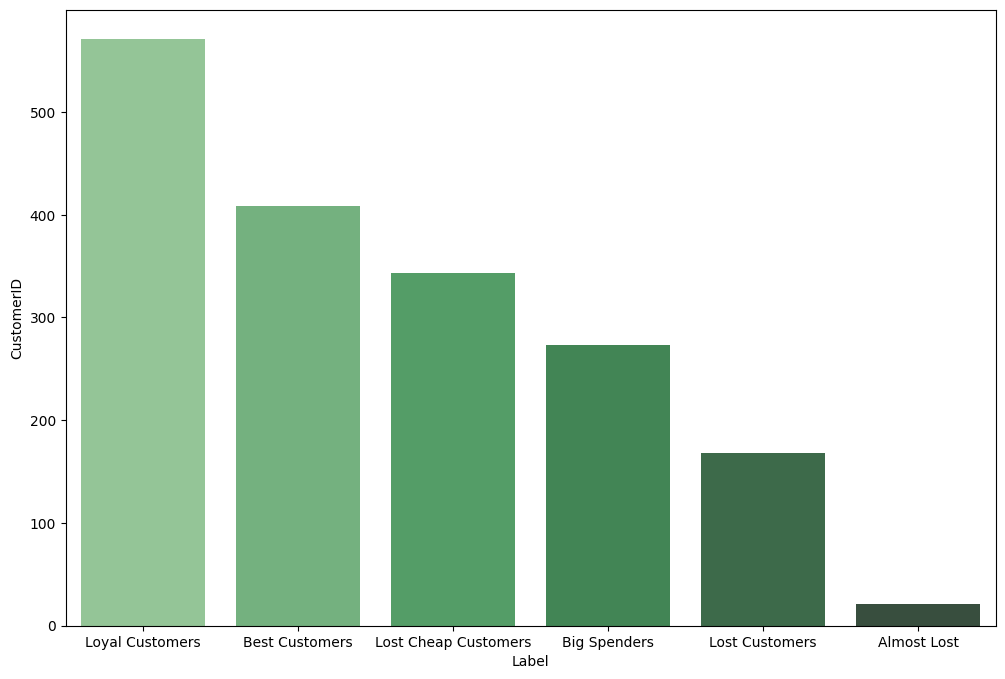

In [53]:
import seaborn as sns
sq1=segmented_rfm.groupby('Label')['CustomerID'].nunique().sort_values(ascending=False).reset_index()
plt.figure(figsize=(12,8))
sq1.drop([0],inplace=True)
sns.barplot(data=sq1, x="Label", y="CustomerID", palette = "Greens_d");

### Modeling Data: K-Means Clustering

The **K-Means clustering** algorithm is an unsupervised machine learning technique used to segment unlabeled data points into **K distinct clusters**. It operates by iteratively grouping data points based on their similarity, ensuring that each data point belongs to only one cluster with similar characteristics.

This approach helps to identify natural groupings within the data, allowing for more targeted analysis and customer segmentation.


In [54]:
RFM_Table_New = RFM_Table.drop('CustomerID', axis=1)

In [55]:
RFM_Table_New.head()

,Recency,Frequency,Monetary
0,325,1,77183.60
1,2,103,4196.01
2,0,4595,33719.73
3,3,199,4090.88
4,3,59,942.34


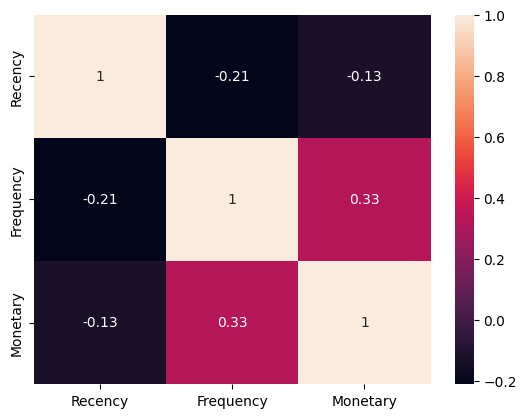

In [56]:
#Heatmap check
sns.heatmap(RFM_Table_New.corr(), annot=True);

<Axes: xlabel='Recency', ylabel='Density'>

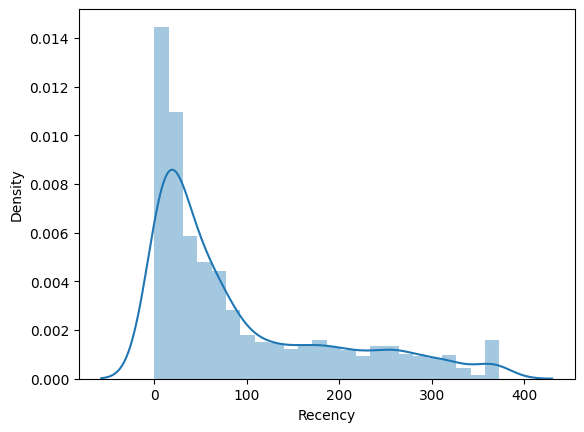

In [57]:
#Analyze distribution

sns.distplot(RFM_Table_New['Recency'])

<Axes: xlabel='Frequency', ylabel='Density'>

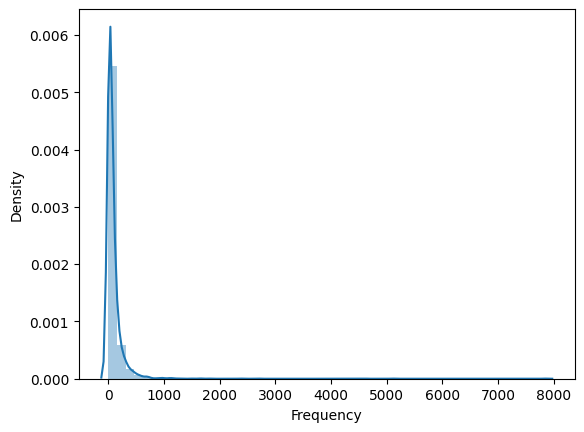

In [58]:
sns.distplot(RFM_Table_New['Frequency'])

<Axes: xlabel='Monetary', ylabel='Density'>

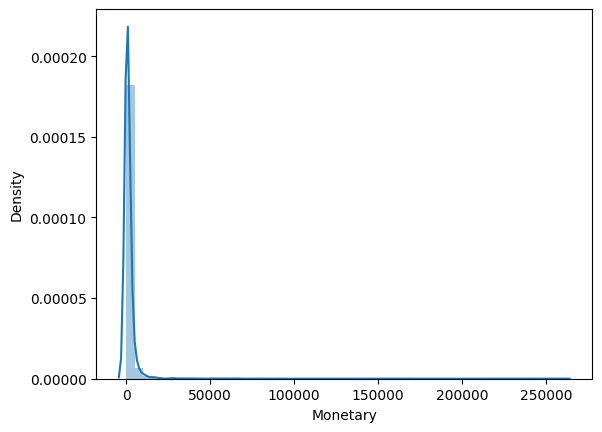

In [59]:
sns.distplot(RFM_Table_New['Monetary'])

K-Means clustering performs optimally under the following conditions:
- The data distribution is **not skewed**.
- The data is **standardized**.

In this dataset, the variables are highly skewed. To address this, we will apply **log transformations** to reduce skewness. A small constant will be added to each value before transformation, as the log function requires all values to be positive.


In [60]:
df_rfm_log = RFM_Table_New.copy()
df_rfm_log.head()

,Recency,Frequency,Monetary
0,325,1,77183.60
1,2,103,4196.01
2,0,4595,33719.73
3,3,199,4090.88
4,3,59,942.34


In [61]:
df_rfm_log = np.log(df_rfm_log+1)

In [62]:
windsoriser = Winsorizer(tail='both', # cap left, right or both tails 
                          fold=2,
                           variables=[ 'Recency', 'Frequency', 'Monetary']
                        )
windsoriser.fit(df_rfm_log)

Winsorizer(fold=2, tail='both', variables=['Recency', 'Frequency', 'Monetary'])

In [63]:
df_rfm_log = windsoriser.transform(df_rfm_log)

After reducing skewness, the data is **standardized** by centering and scaling. This process adjusts all variables to have a mean of **0** and a standard deviation of **1**, ensuring that each feature contributes equally to the clustering process.


In [64]:
#Developing preprocessing with StandardScaler

scaler = StandardScaler()

scaler.fit(df_rfm_log)

RFM_Table_New_scaled = scaler.transform(df_rfm_log)

In [65]:
RFM_Table_New_scaled = pd.DataFrame(RFM_Table_New_scaled, columns=RFM_Table_New.columns)
RFM_Table_New_scaled.head()

,Recency,Frequency,Monetary
0,1.465314,-2.075553,2.144184
1,-2.017962,0.758501,1.551863
2,-2.065658,2.072989,2.144184
3,-1.804222,1.296773,1.530119
4,-1.804222,0.305737,0.272403


<Axes: xlabel='Recency', ylabel='Density'>

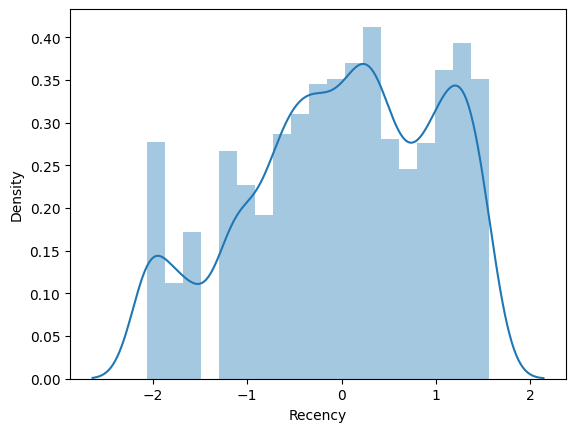

In [66]:
#Analyze distribution

sns.distplot(RFM_Table_New_scaled['Recency'])

<Axes: xlabel='Frequency', ylabel='Density'>

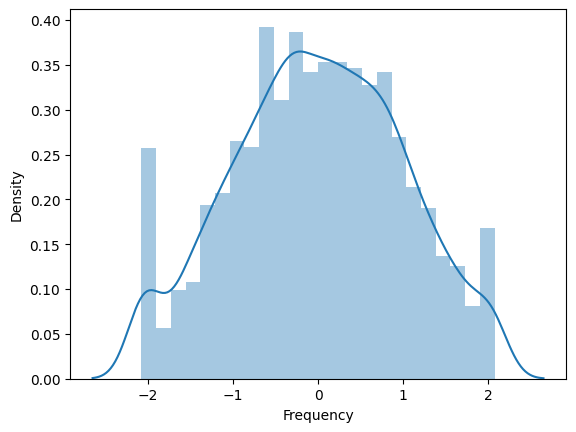

In [67]:
sns.distplot(RFM_Table_New_scaled['Frequency'])

<Axes: xlabel='Monetary', ylabel='Density'>

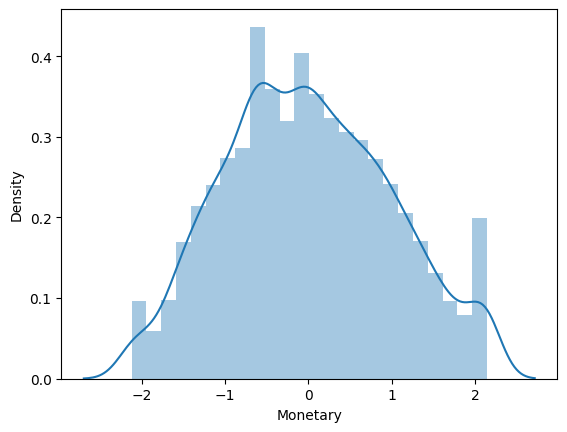

In [68]:
sns.distplot(RFM_Table_New_scaled['Monetary'])

### Finding the Optimal Number of Clusters

In [69]:
X = np.asarray(RFM_Table_New_scaled)

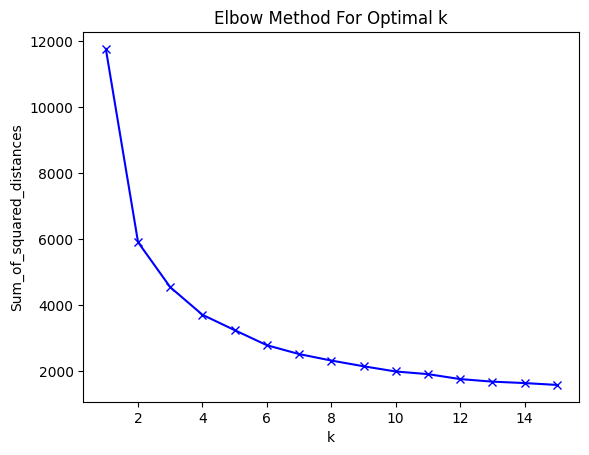

In [70]:
Sum_of_squared_distances = []
K = range(1,16)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [71]:
def kmeans(normalised_df_rfm, clusters_number, original_df_rfm):
    
    kmeans = KMeans(n_clusters = clusters_number, random_state = 1)
    kmeans.fit(normalised_df_rfm)

    # Extract cluster labels
    cluster_labels = kmeans.labels_
        
    # Create a cluster label column in original dataset
    df_new = original_df_rfm.assign(Cluster = cluster_labels)
    
    # Initialise TSNE
    model = TSNE(random_state=1)
    transformed = model.fit_transform(df_new)
    
    # Plot t-SNE
    plt.title('Flattened Graph of {} Clusters'.format(clusters_number))
    sns.scatterplot(x=transformed[:,0], y=transformed[:,1], hue=cluster_labels, style=cluster_labels, palette="Set1")
    
    return df_new

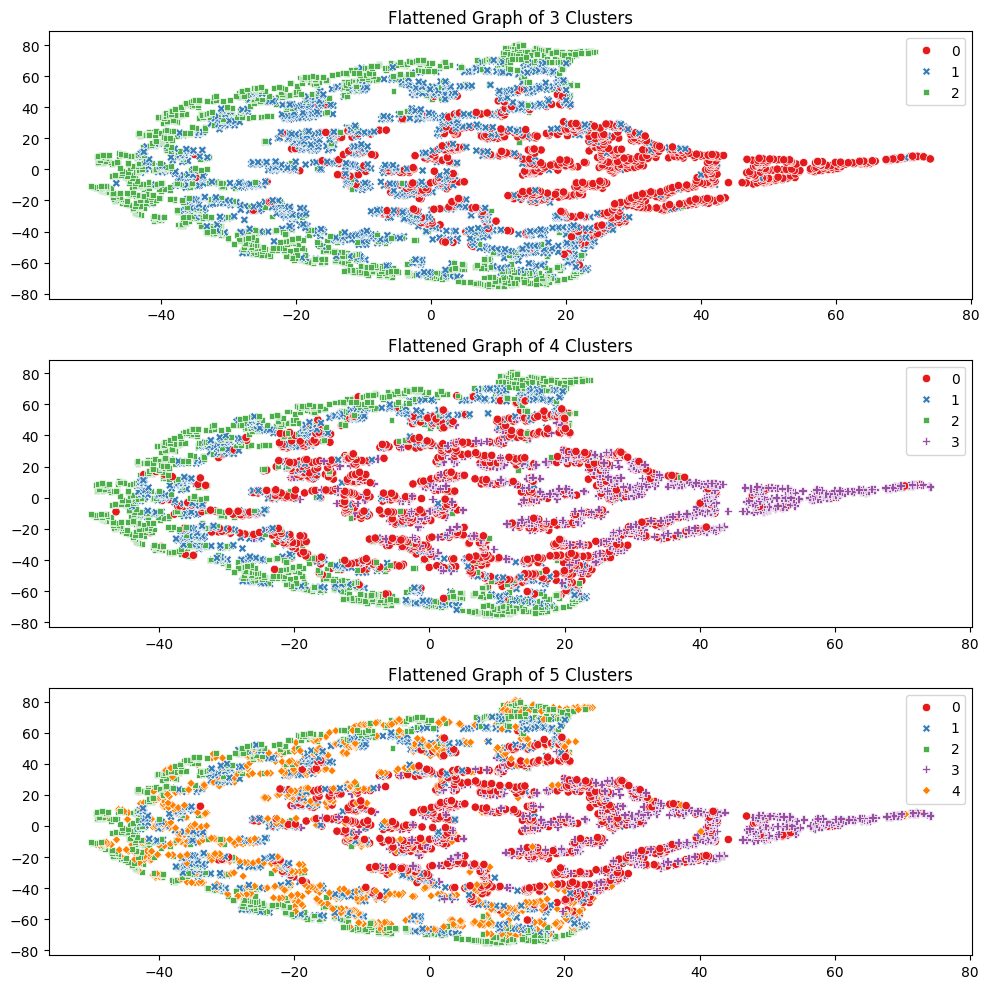

In [72]:
plt.figure(figsize=(10, 10))

plt.subplot(3, 1, 1)
df_rfm_k3 = kmeans(RFM_Table_New_scaled, 3, RFM_Table)

plt.subplot(3, 1, 2)
df_rfm_k4 = kmeans(RFM_Table_New_scaled, 4, RFM_Table)

plt.subplot(3, 1, 3)
df_rfm_k5 = kmeans(RFM_Table_New_scaled, 5, RFM_Table)

plt.tight_layout()


In [73]:
def snake_plot(normalised_df_rfm, df_rfm_kmeans, df_rfm_original):

    normalised_df_rfm = pd.DataFrame(normalised_df_rfm, 
                                       index=RFM_Table.index, 
                                       columns=RFM_Table.columns)
    normalised_df_rfm['Cluster'] = df_rfm_kmeans['Cluster']

    # Melt data into long format
    df_melt = pd.melt(normalised_df_rfm.reset_index(), 
                        id_vars=['CustomerID', 'Cluster'],
                        value_vars=['Recency', 'Frequency', 'Monetary'], 
                        var_name='Metric', 
                        value_name='Value')

    plt.xlabel('Metric')
    plt.ylabel('Value')
    sns.pointplot(data=df_melt, x='Metric', y='Value', hue='Cluster')
    
    return

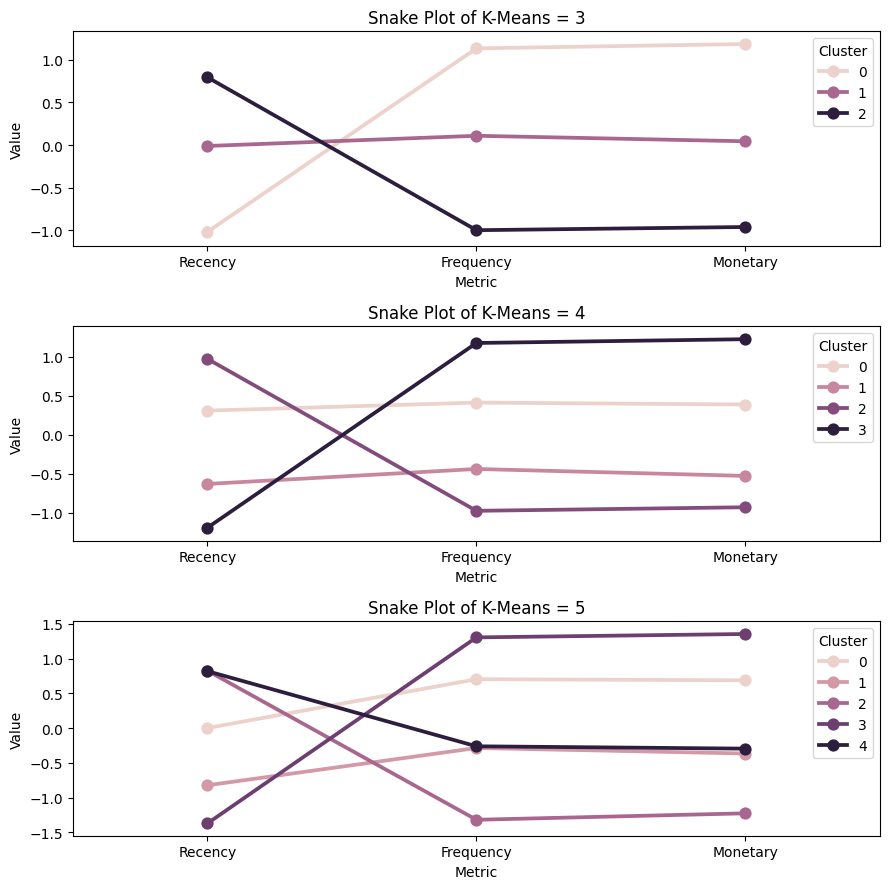

In [74]:
plt.figure(figsize=(9, 9))

plt.subplot(3, 1, 1)
plt.title('Snake Plot of K-Means = 3')
snake_plot(RFM_Table_New_scaled, df_rfm_k3, RFM_Table)

plt.subplot(3, 1, 2)
plt.title('Snake Plot of K-Means = 4')
snake_plot(RFM_Table_New_scaled, df_rfm_k4, RFM_Table)

plt.subplot(3, 1, 3)
plt.title('Snake Plot of K-Means = 5')
snake_plot(RFM_Table_New_scaled, df_rfm_k5, RFM_Table)

plt.tight_layout()

### Evaluating Model: K-Means Clustering

The **Davies-Bouldin Score** is a metric used to evaluate the quality of clustering algorithms. A **lower Davies-Bouldin Score** indicates a better-defined clustering structure, as it reflects more compact and well-separated clusters.




In [78]:
# K-Means = 3
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(n_clusters=3)

In [79]:
print(davies_bouldin_score(X, kmeans.labels_))

1.107858124036092


In [80]:
# K-Means = 3
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

KMeans(n_clusters=4)

In [81]:
print(davies_bouldin_score(X, kmeans.labels_))

1.065528292370768


In [82]:
# K-Means = 5
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)

KMeans(n_clusters=5)

In [83]:
print(davies_bouldin_score(X, kmeans.labels_))

1.0739605605111502


### Evaluating Model: K-Means Clustering

After testing different cluster numbers, **K=4** was found to have the lowest **Davies-Bouldin Score** compared to other options (such as **K=3** and **K=5**). Therefore, the optimal number of clusters for this analysis is **4**, indicating well-separated and compact clusters for effective customer segmentation.


In [84]:
df_rfm_k4.head()

,CustomerID,Recency,Frequency,Monetary,Cluster
0,12346.0,325,1,77183.60,0
1,12747.0,2,103,4196.01,3
2,12748.0,0,4595,33719.73,3
3,12749.0,3,199,4090.88,3
4,12820.0,3,59,942.34,3


In [85]:
df_rfm_k4.Cluster.value_counts()

Cluster
2    1173
0    1130
3     854
1     763
Name: count, dtype: int64

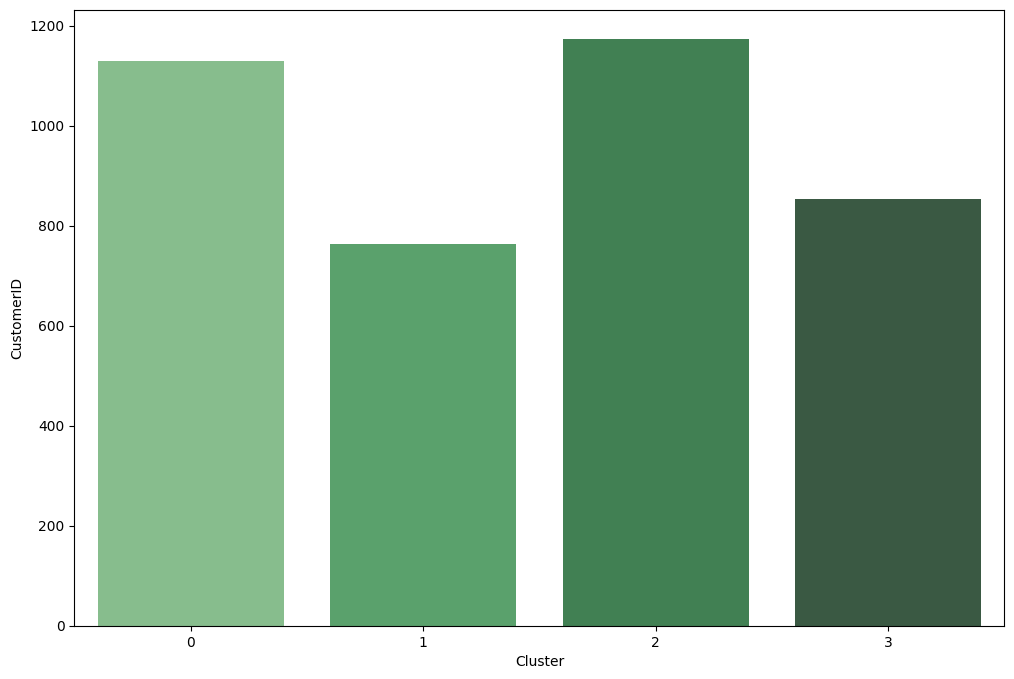

In [86]:
import seaborn as sns
sq1=df_rfm_k4.groupby('Cluster')['CustomerID'].nunique().sort_values(ascending=False).reset_index()
plt.figure(figsize=(12,8))
sns.barplot(data=sq1, x="Cluster", y="CustomerID", palette = "Greens_d");

In [87]:
def rfm_values(df):

    df_new = df.groupby(['Cluster']).agg({
        'Recency': 'mean',
        'Frequency': 'mean',
        'Monetary': ['mean', 'count']
    }).round(0)
    
    return df_new

In [88]:
rfm_values(df_rfm_k4)

Recency Frequency Monetary      
           mean      mean     mean count
Cluster                                 
0          89.0      81.0   1448.0  1130
1          24.0      30.0    463.0   763
2         197.0      15.0    293.0  1173
3          12.0     260.0   5825.0   854

### Cluster Interpretation and Recommendations

#### Cluster Interpretations:

1. **Cluster 0 - Loyal Customers** (29% of customers)
   - **Characteristics**: These customers haven’t purchased recently (R=3) but have a history of frequent purchases (F=2) and moderate spending (M=2).
   - **Interpretation**: This segment represents loyal customers who may need some re-engagement to prompt repeat purchases.

2. **Cluster 1 - Almost Lost Customers** (20% of customers)
   - **Characteristics**: These customers have made recent purchases (R=2) but show low frequency (F=3) and moderate spending (M=3).
   - **Interpretation**: These customers are at risk of churning, and there is an opportunity to increase their engagement.

3. **Cluster 2 - Lost Cheap Customers** (30% of customers)
   - **Characteristics**: Customers in this segment made their last purchase a long time ago (R=4), rarely buy (F=4), and spend little (M=4).
   - **Interpretation**: These are low-value customers who have likely churned, representing a segment where resource allocation can be minimized.

4. **Cluster 3 - Best Customers** (21% of customers)
   - **Characteristics**: These customers purchase frequently (F=1), have high recent activity (R=1), and are the highest spenders (M=1).
   - **Interpretation**: This segment represents the most valuable customers, with high frequency and monetary value.

#### Recommendations:

- **Best Customers (Cluster 3)**:
  - **Strategy**: Focus on increasing purchases by implementing cross-selling and up-selling strategies. Offer exclusive deals and loyalty rewards to further solidify their engagement.

- **Loyal Customers (Cluster 0)**:
  - **Strategy**: Optimize marketing budget and campaign timing for this segment to maintain loyalty and encourage more frequent purchases. Targeted engagement and personalized offers may help retain these customers.

- **Almost Lost Customers (Cluster 1)**:
  - **Strategy**: Develop reactivation and retention strategies aimed at reducing churn. Use incentives, reminders, and special offers to encourage these customers to make additional purchases.

- **Lost Cheap Customers (Cluster 2)**:
  - **Strategy**: Reactivation campaigns can be tested, though resource allocation should be limited. Consider forming cost-effective strategies to selectively re-engage this low-value segment, or focus on acquiring new customers with higher potential.

Each recommendation is designed to maximize customer lifetime value by addressing the unique behaviors and potential of each segment.
